In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklego.datasets import load_chicken
from sklego.preprocessing import ColumnSelector

# READING DATASET

In [4]:
df = load_chicken(as_frame=True)
df.sample(10)

,weight,time,chick,diet
528,231,20,46,4
10,199,20,1,1
409,227,18,36,3
347,138,14,31,3
344,85,8,31,3
141,195,20,12,1
255,175,21,23,2
204,106,16,19,1
281,48,2,26,2
28,84,8,3,1


In [5]:
def plot_model(model):
    df = load_chicken(as_frame=True)
    model.fit(df[['diet', 'time']], df['weight'])
    metric_df = df[['diet', 'time', 'weight']].assign(pred=lambda d: model.predict(d[['diet', 'time']]))
    print(metric_df)
    print(metric_df.shape)
    metric = mean_absolute_error(metric_df['weight'], metric_df['pred'])
    plt.figure(figsize=(12, 4))
    # plt.scatter(df['time'], df['weight'])
    for i in [1, 2, 3, 4]:
        pltr = metric_df[['time', 'diet', 'pred']].drop_duplicates().loc[lambda d: d['diet'] == i]
        plt.plot(pltr['time'], pltr['pred'], color='.rbgy'[i])
    plt.title(f"linear model per group, MAE: {np.round(metric, 2)}");

# FEATURE PIPELINE


     diet  time  weight    pred
0       1     0      42    9.75
1       1     2      51   27.25
2       1     4      59   44.75
3       1     6      64   62.25
4       1     8      76   80.00
..    ...   ...     ...     ...
573     4    14     175  164.50
574     4    16     205  182.00
575     4    18     234  199.50
576     4    20     264  217.25
577     4    21     264  226.00

[578 rows x 4 columns]
(578, 4)


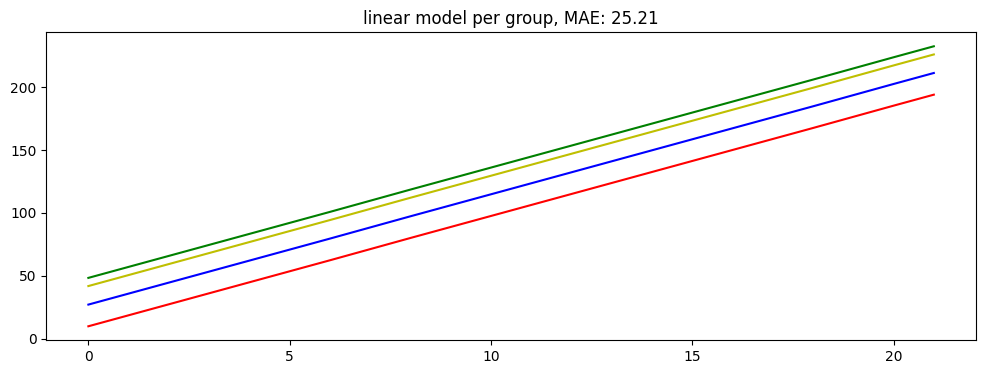

In [6]:
feature_pipeline = Pipeline([
    ("datagrab", FeatureUnion([
        ("discrete", Pipeline([
            ("grab", ColumnSelector("diet")),
            ("encode", OneHotEncoder(categories="auto", sparse=False))
        ])),
        ("continuous", Pipeline([
            ("grab", ColumnSelector("time")),
            ("standardize", StandardScaler())
        ]))
    ]))
])

pipe = Pipeline([
    ("transform", feature_pipeline),
    ("model", LinearRegression())
])

plot_model(pipe)

In [10]:
pip install sklego

Note: you may need to restart the kernel to use updated packages.


     diet  time  weight        pred
0       1     0      42   30.930980
1       1     2      51   44.614575
2       1     4      59   58.298169
3       1     6      64   71.981763
4       1     8      76   85.665358
..    ...   ...     ...         ...
573     4    14     175  166.793237
574     4    16     205  186.221968
575     4    18     234  205.650700
576     4    20     264  225.079431
577     4    21     264  234.793796

[578 rows x 4 columns]
(578, 4)


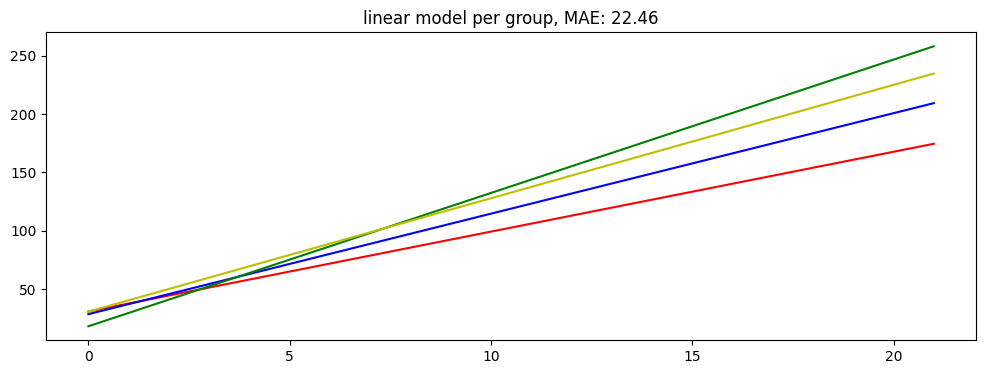

In [12]:
from sklego.meta import GroupedPredictor
mod = GroupedPredictor(LinearRegression(),groups=["diet"])
plot_model(mod)